# NTDS assignment 2: network models
[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), *PhD student*, [EPFL](http://epfl.ch) [LTS4](http://lts4.epfl.ch)

For this assignment we will work on a network representing the collaboration between scientists in the field of General Relativity and Quantum Cosmology. The network comes from [SNAP](http://snap.stanford.edu/data/ca-GrQc.html) and is described as follows:

> Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network is from the e-print [arXiv](https://arxiv.org) and covers scientific collaborations between authors papers submitted to General Relativity and Quantum Cosmology category. If an author *i* co-authored a paper with author *j*, the graph contains a undirected edge from *i* to *j*. If the paper is co-authored by *k* authors this generates a completely connected (sub)graph on *k* nodes. The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv.

In [1]:
%matplotlib inline
from __future__ import division

import os
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import warnings
import math

warnings.filterwarnings('ignore')

In [2]:
G = nx.read_edgelist(os.path.join('..', 'data', 'arxiv_collaboration_network.txt'))

In [3]:
print('My network has {} nodes.'.format(len(G.nodes())))
print('My network has {} edges.'.format(G.size()))
print('My network has {} density.'.format(nx.density(G)))

My network has 5242 nodes.
My network has 14496 edges.
My network has 0.00105527828051 density.


## 1. Comparing to model networks

1.1 In this part of the assignment, you have to create an Erdős–Rényi and Barabási-Albert graph using NetworkX, and compare them to the collaboration network. Try to simulate the original network as best as you can. When choosing parameters for the networks, take into account the number of vertices and edges of the original network. The number of vertices should be exactly the same. Comment on your choice of parameters.

In [4]:
edges_G = G.size()
nodes_G = len(G.nodes())

p = 2 * edges_G / (nodes_G * (nodes_G-1))
er = nx.erdos_renyi_graph(nodes_G, p, seed=12345) # seed for reproducibility

m = int((edges_G/nodes_G))
ba = nx.barabasi_albert_graph(nodes_G, m, seed=12345)

**Answer**

Ensuring that Erdős–Rényi network contains same number of vertices can be done explicitly by setting number of nodes parameter equal to same amount of nodes as available in the G network (5242 nodes). When it comes to edges we can define an appropriate probability of edge creation as p= 2*E / (N*(N-1)). Erdős–Rényi network with probability of edge creation in such way has expected value of edges converging to E. For the given collaboration network the parameter p of Erdős–Rényi network equals to 0.00105527828051.

Same reasoning was used during creation of Barabási-Albert when it comes to number of nodes.
Edges, however, in Barabási-Albert network are created given parameter m, which defines number of edges to attach from a new node to existing nodes. Thus one can expect number of edges to be created equal to m*N, which on the other hand implies that m = E/N. Since m needs to be integer I assumend m = round(E/N) = 3.

**Your answer here.**

In [5]:
print('My Erdős–Rényi network has {} nodes.'.format(len(er.nodes())))
print('My Erdős–Rényi network has {} edges.'.format(er.size()))
print('My Erdős–Rényi network has {} density.'.format(nx.density(er)))
print('My Barabási-Albert network has {} nodes.'.format(len(ba.nodes())))
print('My Barabási-Albert network has {} edges.'.format(ba.size()))
print('My Barabási-Albert network has {} density.'.format(nx.density(ba)))

My Erdős–Rényi network has 5242 nodes.
My Erdős–Rényi network has 14522 edges.
My Erdős–Rényi network has 0.00105717102577 density.
My Barabási-Albert network has 5242 nodes.
My Barabási-Albert network has 10480 edges.
My Barabási-Albert network has 0.000762921935687 density.


1.2 Check the size of the largest connected component in each graph and compare them to the original network. In the Erdős–Rényi model, what should the probability of creating each edge be in order to have the same expected size of the largest component? Justify. Generate a graph with this parameter to check if you indeed get a similar value.

In [6]:
giant_G = max(nx.connected_component_subgraphs(G), key=len)
giant_er = max(nx.connected_component_subgraphs(er), key=len)
giant_ba = max(nx.connected_component_subgraphs(ba), key=len)
print(len(giant_G.nodes()))
print(len(giant_er.nodes()))
print(len(giant_ba.nodes()))

4158
5226
5242


In [7]:
for g in list(nx.connected_component_subgraphs(G)):
    print(len(g.nodes()))

4158
4
3
2
3
5
4
3
2
3
10
7
3
3
3
9
3
3
3
2
2
3
4
5
3
12
3
5
3
2
2
4
7
3
2
4
8
2
2
6
2
2
2
3
5
5
3
4
3
2
5
2
4
2
5
4
4
6
3
2
2
2
8
3
2
3
4
3
2
3
3
8
2
3
3
3
3
2
2
6
2
3
14
5
6
2
3
2
2
7
6
6
9
3
4
5
2
4
3
2
2
5
6
4
3
4
2
3
4
2
3
2
3
8
3
4
4
2
3
2
7
2
2
3
4
2
2
2
2
3
2
2
2
6
2
3
2
5
3
3
4
3
7
3
4
3
2
2
3
1
2
2
2
3
4
5
2
3
3
3
3
2
2
2
3
2
3
2
2
2
2
2
3
3
2
2
2
5
2
3
2
8
2
2
3
2
3
3
7
5
2
4
2
4
3
2
2
7
7
6
2
3
2
5
2
2
4
2
4
3
2
3
2
2
2
2
2
2
6
5
2
2
2
6
2
2
2
3
2
4
3
2
2
3
3
2
2
2
3
2
2
3
2
2
6
2
2
2
4
2
2
2
2
2
2
2
2
3
2
3
3
3
5
4
2
3
2
2
4
3
2
2
4
3
3
3
2
2
2
2
2
3
2
2
2
2
8
3
3
2
2
3
2
2
3
3
2
2
3
2
3
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
2
2
2
2
2
3
3
3
2
2
3
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [8]:
for g in list(nx.connected_component_subgraphs(er)):
    print(len(g.nodes()))

5226
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [9]:
for g in list(nx.connected_component_subgraphs(ba)):
    print(len(g.nodes()))

5242


**Answer**

Unsurprisingly the original, real life network of collaborations contains one giant component and a subset of smaller subgraphs disconnected from the giant component and rest of the graph, while Erdős–Rényi model contains almost exclusively one giant component and only of handful of disconnected subgraphs which are dangling nodes. Unsurprisingly, due to the nature of graph generation where each node gets connected to the others with preferential attachement, Barabási-Albert network has all nodes connected. In order to match the size of giant component within original network and Erdős–Rényi model, the parameter p should be defined as follows:

- knowing that Ng / N = S and S = 1 - e**(-<k>*S) and
- < k > = p*(N-1) thus
- p = -ln(1-S) / ((N-1)*S)
- p = -ln(1-(Ng/N)) / ((N-1)*(Ng/N)

In [10]:
giant_nodes_G = len(giant_G.nodes()) # Ng
p_giant = (-1 * math.log(1-(giant_nodes_G/nodes_G))) / ((nodes_G-1)*(giant_nodes_G/nodes_G))
er_2 = nx.erdos_renyi_graph(nodes_G, p_giant, seed=12345)
er_giant = max(nx.connected_component_subgraphs(er_2), key=len)

In [11]:
# Your code here.
print('The parameter p for an Erdős–Rényi network with the same expected size of the giant component is {}.'.format(p_giant))

# Your code here.
print('The size of the component in a randomly generated network with this parameter is {}.'.format(len(er_giant.nodes())))

The parameter p for an Erdős–Rényi network with the same expected size of the giant component is 0.000379111572025.
The size of the component in a randomly generated network with this parameter is 4203.


Justification: One should intuitively lower the probability p in order to achieve smaller giant component and more disconnected subgraphs for the Erdős–Rényi model.

1.3 Look at the clustering coefficient of the original network. Is there a network model we talked about that could have a clustering coefficient that is close? Explain.

In [12]:
nx.average_clustering(G)

0.5296358110521363

** Answer **

Both Erdős–Rényi model and Barabási-Albert model are not expected to have similar clustering coefficient to the one of original network. In general real life networks such as scientific collaborators have a tendency to form cliques where probability of knowing collaborator of our collaborator is higher than probability of knowing any collaborator in the entire network. This does not hold true in ER and model where probability of connection between any nodes is the same, and when it comes to BA model it favors preferential nodes and prevents the creation of subgraphs disconnected from main component which is also not accurate for real life network.

In [13]:
print(nx.average_clustering(er))
print(nx.average_clustering(ba))

0.00118336981176
0.0111571554249


## 2. Creating a network with a predefined degree distribution

In this part of the assignment, you will have to create a random network from a predefined degree distribution. There are several network models which can create a random network with the exact same degree distribution as the original, or with the same expected distribution as the original. Refer to section 4.8 of [the Barabási book](http://networksciencebook.com) for more information.

One of the most famous ones is the configuration model. The model for a graph with $L$ edges in total is constructed in the following steps:

- Assign a degree to each node, represented as stubs (half-links). The degree sequence is either generated analytically from a preselected distribution, or it is extracted from the adjacency matrix of a real network. Note that we must start from an even number of stubs to avoid being left with unpaired stubs.
- Randomly select a stub pair and connect them. Then randomly choose another pair from the remaining $2L - 2$ stubs and connect them. This procedure is repeated until all stubs are paired up.

*Reminder:* A stub is a half-link, representing the half of an edge. It contains one node and can be paired up with another stub to create an edge (between the two corresponding nodes).

2.1 However, this model allows for the creation of multi-links (multiple edges between the same pair of vertices) and self-loops, thus leading to a non-simple graph. In this assignment, you will implement a greedy configuration model, to avoid these problems.

The algorithm goes as follows:
- Extract the degree sequence from our collaboration network.
- Assign a target degree to each node, represented as stubs or half-links. Use the degree sequence extracted from the collaboration network.
- Sort the nodes by degree. 
    - Pick the node with the highest target degree. Delete all its stubs from the list of stubs to make sure we don't create a self loop.
    - Until all its weighted degree equals its target degree: 
        - Randomly select one stub from the list of stubs (corresponding to one of the other nodes), and connect these two nodes. In case the two chosen nodes are already connected, simply increase the weight of this edge by one. Be careful to randomly select from stubs and not from nodes, as this means the chances of selecting a node will be proportional to its target degree.
    - When the number of edges adjacent to this node corresponds to its target degree, go on to the second node in the list. 
    - Repeate this procedure until all stubs are paired up, or there is only one node left with a pair number of stubs. In that case, don't create a self-loop, but discard the stubs.
    
*Hints*: 
 - Use `nx.empty_graph()` to create an empty graph.
 - Use `G.add_edge(node1,node2,weight = 1)` to add an edge to a weighted graph.
 - Use `G.edge[node1][node2]['weight'] += 1` to increment the weight of an edge by one.

In [14]:
def greedy_configuration(degree_distribution):
    # Your code here.
    N=len(degree_distribution)

    G=nx.empty_graph(N)

    # build stublist, a list of available degree-repeated stubs
    # e.g. for deg_sequence=[3,2,1,1,1]
    # initially, stublist=[1,1,1,2,2,3,4,5]
    # i.e., node 1 has degree=3 and is repeated 3 times, etc.
    stublist=[]
    for n in range(0,N):
        for i in range(degree_distribution[n]):
            stublist.append(n) 
    
    for node_id in range(0, N):
            stub_indices = [i for i, value in enumerate(stublist)]
            node_stub_indices = [i for i, value in enumerate(stublist) if value == node_id]
            other_stub_indices = list(set(stub_indices) - set(node_stub_indices))
            stublist = [stublist[indx] for indx in other_stub_indices] #new stublist without current node

            for degree in range(0, len(node_stub_indices)):
                other_node_id = random.randint(0, len(stublist)-1)
                other_node = stublist[other_node_id]
                del stublist[other_node_id]

                if G.has_edge(node_id, other_node):
                    G.edge[node_id][other_node]['weight'] += 1
                else:
                    G.add_edge(node_id, other_node, weight = 1)
    return G

In [15]:
degree_distribution=sorted(nx.degree(G).values(),reverse=True) # degree distribution sorted from highest to lowest
gc = greedy_configuration(degree_distribution)

In [16]:
print(gc.number_of_nodes())
print(gc.number_of_edges())
print(gc.number_of_selfloops())

5242
14420
0


2.2 Verify that the networks have the same number of nodes. Plot the difference between the weighted degree distributions to verify that they are identical. If not, why?

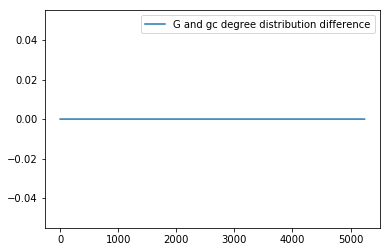

In [17]:
degree_sequence_gc=sorted(nx.degree(gc, weight = 'weight').values(),reverse=True) #weighted degree distribution
# Your code here.

## Verify that networks have same number of nodes:
if(len(degree_sequence_gc) == len(degree_distribution) and (len(G.nodes()) == len(gc.nodes())) ):
    diff = [degree_sequence_gc[i] - degree_distribution[i] for i, v in enumerate(degree_distribution)]
    
plt.plot(diff)
plt.legend(['G and gc degree distribution difference'])
plt.show()

** Answer **

Unsurprisingly, since two networks consist of exact same edges and nodes the degree distribution is the same and the case when there are any stubs left for last node is not possible.

2.3 Should these two networks have the same adjacency matrices? Justify.

** Answer **

Since the degree distribution is the same, adjecency matrices will also be the same if we neglected the ids of the nodes and analyse only degree distributions by sorting matrices row wise. Otherwise, there is no reason to belive that adjecency matrices should be the same.

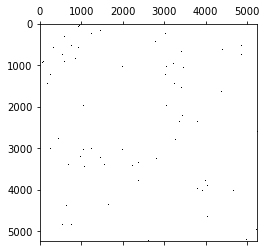

In [18]:
plt.spy(nx.adj_matrix(G).todense())

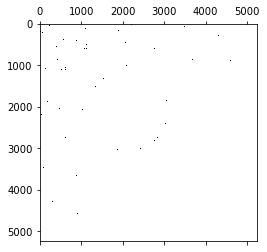

In [19]:
plt.spy(nx.adj_matrix(gc).todense())

2.4 Draw both the generated and original networks. Are they similar? If not, why? Try to explain.

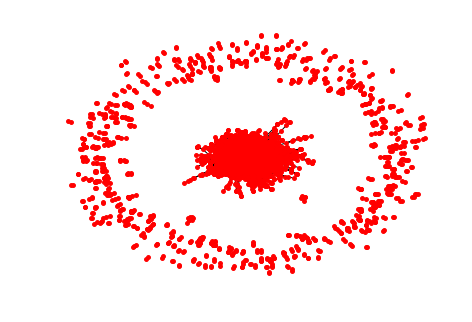

In [20]:
# Your code here.
nx.draw(G,node_size=15)

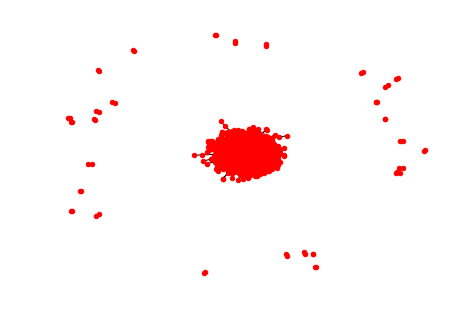

In [21]:
nx.draw(gc,with_labels=False,node_size=20)

** Answer **

Both models have clear giant component however original network consist of much larger amount of smaller subcomponents disconnected from the giant one, but this is where similarities end (appart from degree distribution which is not visualised here). For the greedy configuration model we can spot smaller amount of dangling nodes (which are consisting of at least two connected nodes since greedy configuration allows only one cration of a truly dangling singular node, which is not the case here). Such result should not be surprised since each node is paired with another randomly and as a result almost whole network should be connected with only few rare cases where subgraphs are disconnected from the main giant one.

2.5 Do you expect the properties studied in the first part of the assignment to be close to the original graph? Justify.

** Answer **

Unsurprisingly, one should expect exact same number of nodes and edges for both networks.
Nothing speeks in favor of believing that giant component or clustering coeficient should be the same. Greedy configuration model only shares degree distribution and one can even expect it to have giant component of size similar to Erdős–Rényi model since only few node pairs are dangling.

In [22]:
giant_gc = max(nx.connected_component_subgraphs(gc), key=len)
print(len(giant_gc.nodes()))

5184


In [23]:
for g in list(nx.connected_component_subgraphs(gc)):
    print(len(g.nodes()))

5184
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
